In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_src = r"E:\data\From server\24 Hour Stacks\first_10\Stack 0001\Brightfield - Prosilica\*tif"

In [4]:
import os
root_folder = r"E:\data\From server\24 Hour Stacks\first_10"

phases = []
delta_phases = []
folders = []
ref_locs = []

for folder in os.listdir(root_folder):
    oog = OG.BasicOpticalGating()
    for file in os.listdir(root_folder  + "/" + folder):
        # Run OOG
        if file.startswith("Brightfield"):
            oog.sequence_manager.set_source(root_folder + "/" + folder + "/" + file + "/*tif")
        elif file.startswith("ref-frames"):
            oog.sequence_manager.set_reference_sequence(root_folder + "/" + folder + "/" + file + "/*tif")
            oog.sequence_manager.reference_period = np.loadtxt(root_folder + "/" + folder + "/" + file + "/period.txt")[0]
    oog.run()
    folders.append(folder)
    phases.append(oog.phases)
    delta_phases.append(oog.delta_phases)
    

Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0001/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0001/ref-frames-2018-07-30-13.32.11/*tif
Getting SADs
Getting phases
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0002/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0002/ref-frames-2018-07-30-13.36.14/*tif
Getting SADs
Getting phases
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0003/ref-frames-2018-07-30-13.41.22/*tif
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0003/Brightfield - Prosilica/*tif
Getting SADs
Getting phases
Setting source to E:\data\From server\24 Hour Stacks\first_10/Stack 0004/Brightfield - Prosilica/*tif
Loading reference sequence from E:\data\From server\24 Hour Stacks\first_10/Stack 0004/ref-frames-2018-07-30-13.46.17/*tif
Getting SADs
Get

In [6]:
delta_phases = np.concatenate(delta_phases)

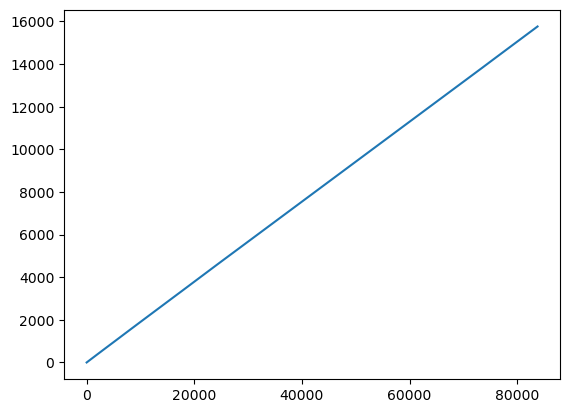

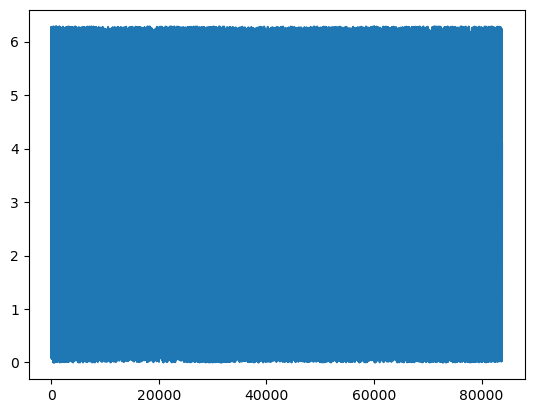

In [13]:
unwrapped_phases = np.cumsum(delta_phases)
plt.plot(unwrapped_phases)
plt.show()

phases = unwrapped_phases % (2*np.pi)

plt.plot(phases)
plt.show()

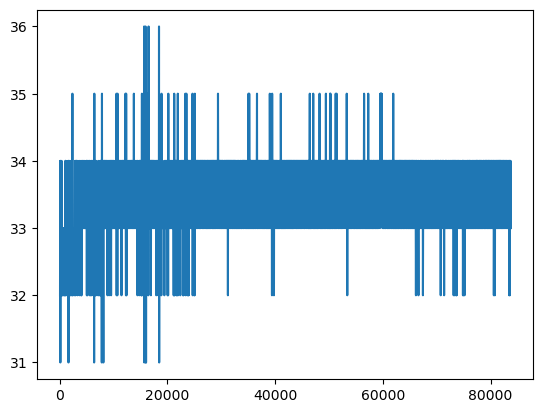

[33, 65, 99, 130, 164, 197, 229, 261, 294, 326, 360, 392, 424, 457, 489, 521, 554, 587, 620, 653, 686, 719, 751, 784, 817, 850, 882, 915, 948, 980, 1012, 1046, 1080, 1112, 1146, 1179, 1212, 1245, 1278, 1311, 1344, 1376, 1409, 1442, 1475, 1508, 1540, 1574, 1606, 1637, 1671, 1704, 1738, 1772, 1804, 1836, 1869, 1902, 1934, 1966, 1999, 2032, 2065, 2098, 2132, 2164, 2198, 2231, 2264, 2297, 2330, 2365, 2397, 2430, 2462, 2495, 2528, 2561, 2594, 2627, 2660, 2693, 2726, 2759, 2791, 2824, 2858, 2891, 2924, 2956, 2990, 3023, 3057, 3090, 3124, 3157, 3191, 3224, 3257, 3290, 3322, 3355, 3389, 3422, 3455, 3488, 3521, 3554, 3587, 3620, 3653, 3687, 3719, 3752, 3785, 3818, 3851, 3884, 3917, 3951, 3983, 4016, 4048, 4081, 4114, 4148, 4181, 4214, 4247, 4281, 4314, 4347, 4380, 4414, 4447, 4480, 4513, 4546, 4579, 4613, 4646, 4679, 4712, 4745, 4778, 4811, 4844, 4877, 4911, 4944, 4977, 5011, 5043, 5077, 5110, 5142, 5176, 5209, 5242, 5275, 5308, 5341, 5375, 5408, 5441, 5474, 5507, 5541, 5573, 5607, 5640, 5673, 

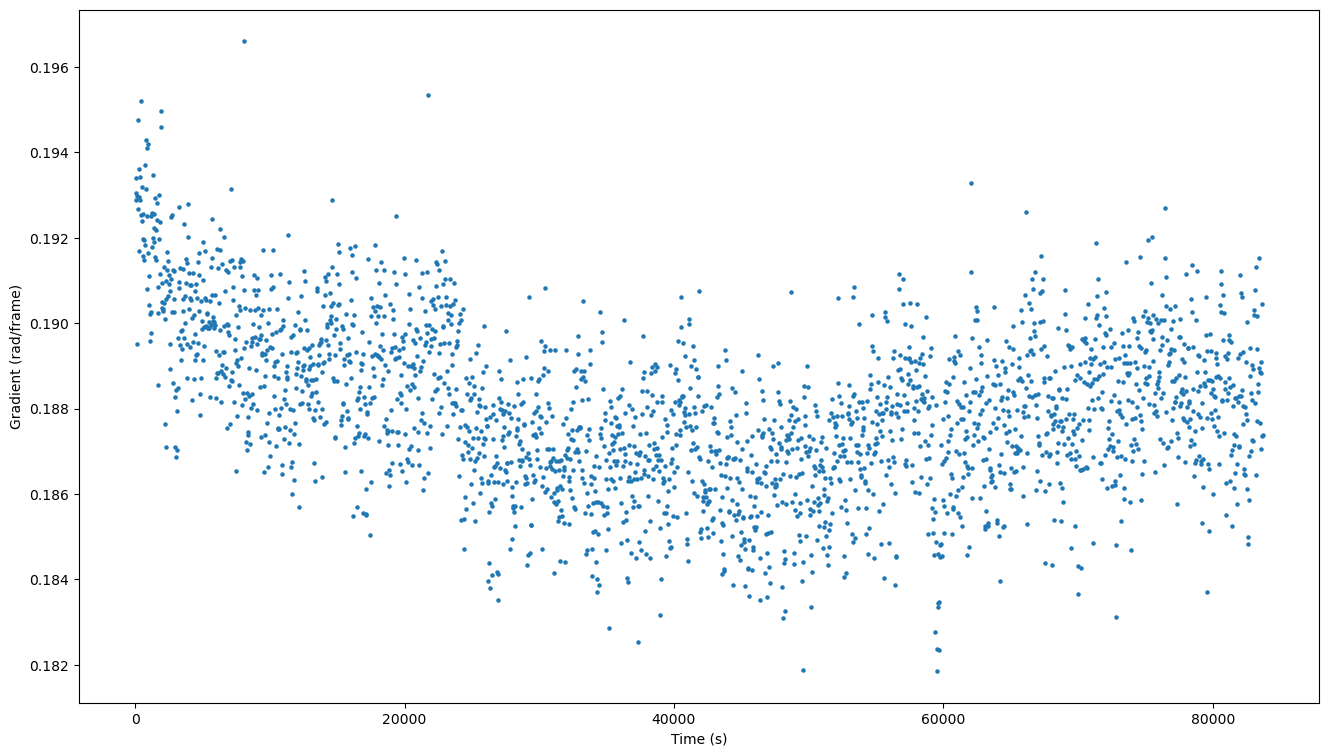

In [30]:
i_prev = 0
beat_indices = []
for i in range(1, phases.shape[0]):
    if (phases[i] - phases[i - 1]) < -np.pi:
        if abs(i_prev - i) > 5:
            beat_indices.append(i)
            i_prev = i

plt.plot(beat_indices[1::], np.diff(beat_indices))
plt.show()

print(beat_indices)
gradients = []
from scipy.optimize import curve_fit
for i in range(len(beat_indices) - 2):
    xs = range(beat_indices[i], beat_indices[i+2])
    ys = unwrapped_phases[beat_indices[i]:beat_indices[i+2]]
    popt, popc = curve_fit(lambda x, a, b: a * x + b, xs, ys)
    gradients.append(popt[0])

plt.figure(figsize = (16,9))
plt.scatter(np.array(beat_indices[:-2]), gradients, s = 5)
#plt.ylim(0.006, 0.011)
plt.xlabel("Time (s)")
plt.ylabel("Gradient (rad/frame)")
plt.show()

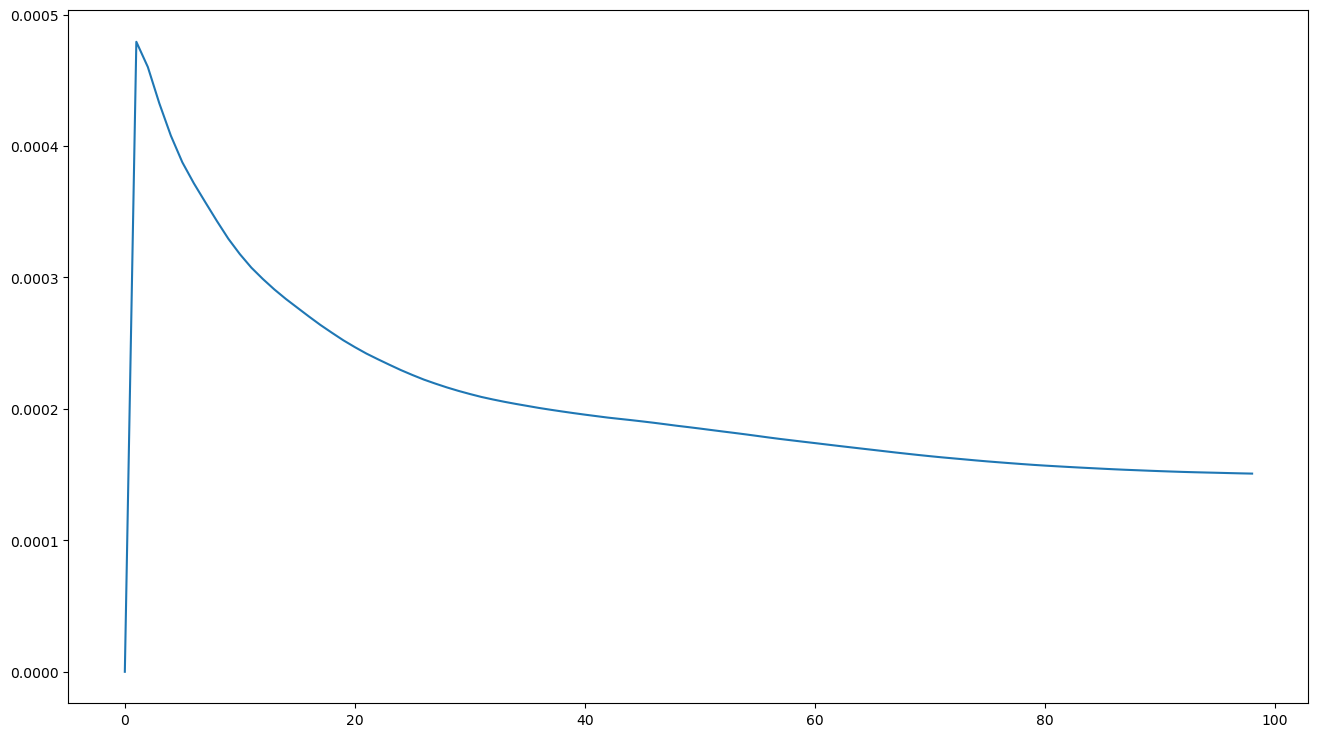

In [28]:
# Plot standard deviation for all possible time intervals up to 100 frames
plt.figure(figsize = (16,9))

stds = []
for i in range(1, 100):
    std = []
    for j in range(0, len(gradients) - i):
        std.append(np.std(gradients[j:j+i]))
    stds.append(np.std(std))
plt.plot(stds, label = str(i))


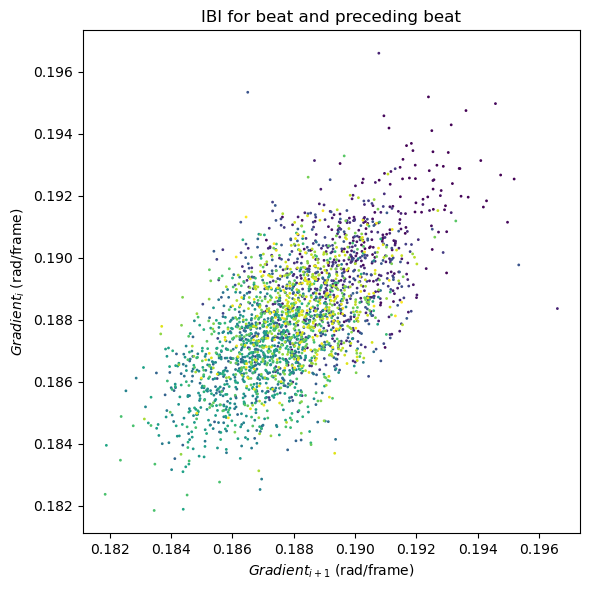

In [38]:
plt.figure(figsize = (6,6))
plt.title("IBI for beat and preceding beat")
plt.scatter(gradients[1::], gradients[:-1], s = 1, c = beat_indices[1:-2])
#plt.xlim(0, 0.04)
#plt.ylim(0, 0.04)
plt.xlabel("$Gradient_{i+1}$ (rad/frame)")
plt.ylabel("$Gradient_{i}$ (rad/frame)")
plt.tight_layout()
plt.show()